### Michał Szczurek - lab 1. ###

In [4]:
import numpy as np
from matplotlib import pyplot as plt

#### Zadanie 1. Wyznaczenie maszynowego epsilon ####

In [1]:
def find_eps(func):
    potential_eps = func(1.0)
    total = func(1.0) + func(potential_eps)
    
    while total > 1.0:
        potential_eps /= func(2.0)
        total = func(1.0) + potential_eps

    return potential_eps * 2

In [5]:
print("Wartość wyznaczona funkcją:",find_eps(float))

Wartość wyznaczona funkcją: 2.220446049250313e-16


In [6]:
print("Wartość wyznaczona funkcją:",find_eps(np.float32))

Wartość wyznaczona funkcją: 1.1920928955078125e-07


In [7]:
print("Wartość wyznaczona funkcją:",find_eps(np.float64))

Wartość wyznaczona funkcją: 2.220446049250313e-16


#### Zadanie 2.####


Wykres |sin(x) - sin(x+h)|

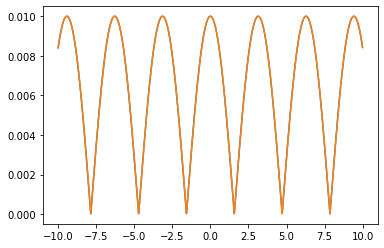

In [8]:
x = np.arange(-10.0, 10.0, 0.01)
h = 0.01
y = abs(np.sin(x)-np.sin(x+h))
z = abs(np.cos(x)*h)
plt.plot(x,y,x,z)

Wykres funkcji | x ctg(x)|

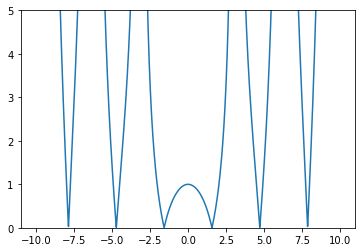

In [9]:
x = np.arange(-10.0, 10.0, 0.01)
y = abs(1.0/np.tan(x) * x)
plt.ylim(0,5)
plt.plot(x,y)

#### Zadanie 3. #### 

Funkcje do wyliczania błędów:

In [10]:
def forward_err(x, function):
    return abs(np.sin(x) - function(x))

In [11]:
def backward_err(x, function):
    return abs(np.arcsin(function(x)) - x)

In [12]:
def print_data(x, function):
    print("Wartość dokładna:", np.sin(x))
    print("Wartość przybliżona:", function(x))
    print("Błąd progresywny:", forward_err(x, function))
    print("Błąd wsteczny:", backward_err(x, function))

#### a) Przybliżanie sin(x) pierwszym wyrazem szeregu ####

In [13]:
def tylor_sin_one(x):
    return x

In [14]:
print_data(0.1, tylor_sin_one)

Wartość dokładna: 0.09983341664682815
Wartość przybliżona: 0.1
Błąd progresywny: 0.0001665833531718508
Błąd wsteczny: 0.00016742116155979425


In [15]:
print_data(0.5, tylor_sin_one)

Wartość dokładna: 0.479425538604203
Wartość przybliżona: 0.5
Błąd progresywny: 0.020574461395796995
Błąd wsteczny: 0.023598775598298927


In [16]:
print_data(1.0, tylor_sin_one)

Wartość dokładna: 0.8414709848078965
Wartość przybliżona: 1.0
Błąd progresywny: 0.1585290151921035
Błąd wsteczny: 0.5707963267948966


#### b) Przybliżanie sin(x) dwoma wyrazami szeregu ####

In [17]:
def tylor_sin_two(x):
    return x - x**3 / 6.0

In [18]:
print_data(0.1, tylor_sin_two)

Wartość dokładna: 0.09983341664682815
Wartość przybliżona: 0.09983333333333334
Błąd progresywny: 8.331349481138783e-08
Błąd wsteczny: 8.373180472587283e-08


In [19]:
print_data(0.5, tylor_sin_two)

Wartość dokładna: 0.479425538604203
Wartość przybliżona: 0.4791666666666667
Błąd progresywny: 0.0002588719375363202
Błąd wsteczny: 0.0002949592406357171


In [20]:
print_data(1.0, tylor_sin_two)

Wartość dokładna: 0.8414709848078965
Wartość przybliżona: 0.8333333333333334
Błąd progresywny: 0.008137651474563135
Błąd wsteczny: 0.01488921666225429


#### Zadanie 4. ####

a) algorytm niestabilny numerycznie

In [21]:
def unstable(N):
    y = np.log(11) - np.log(10)
    print("n = ",0, ": ", y, sep="")
    for n in range(1,N+1):
        y = 1.0/n - 10.0 * y
        print("n = ",n, ": ", y, sep="")
    

In [22]:
unstable(18)

n = 0: 0.09531017980432477
n = 1: 0.04689820195675232
n = 2: 0.031017980432476833
n = 3: 0.023153529008564988
n = 4: 0.01846470991435012
n = 5: 0.015352900856498819
n = 6: 0.013137658101678468
n = 7: 0.011480561840358172
n = 8: 0.010194381596418278
n = 9: 0.009167295146928323
n = 10: 0.00832704853071678
n = 11: 0.007638605601923115
n = 12: 0.0069472773141021765
n = 13: 0.007450303782055162
n = 14: -0.0030744663919801962
n = 15: 0.09741133058646863
n = 16: -0.9116133058646863
n = 17: 9.174956588058627
n = 18: -91.69401032503072


b) algorytm stabilny numerycznie

In [23]:
def stable(N):
    res = []
    y = 1/(11.0 * (N + 1.0))
    res.append(y)
    
    for n in range(N-1,-1,-1):
        y = 1.0/(10.0 * (n+1.0)) - y/10.0
        res.append(y)
   
    res.reverse()    
    for i, y in enumerate(res):
        print("n = ", i , ": ", y, sep="")

In [24]:
stable(18)

n = 0: 0.09531017980432487
n = 1: 0.0468982019567514
n = 2: 0.031017980432486002
n = 3: 0.02315352900847329
n = 4: 0.018464709915267108
n = 5: 0.01535290084732894
n = 6: 0.013137658193377262
n = 7: 0.011480560923370223
n = 8: 0.01019439076629778
n = 9: 0.009167203448133309
n = 10: 0.00832796551866692
n = 11: 0.007629435722421713
n = 12: 0.007038976109116203
n = 13: 0.006533315831914903
n = 14: 0.006095413109422397
n = 15: 0.005712535572442693
n = 16: 0.005374644275573068
n = 17: 0.005077086656034025
n = 18: 0.004784688995215311
